<a href="https://colab.research.google.com/github/VanLan0/MIS710/blob/main/MIS710_Lab_7_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lecture 7: Introduction to Artificial Neural Netowrks**

Author: Associate Professor Lemai Nguyen

Objectives:

* To learn to build and test ANN models for classification and regression
* To evaluate the models based on the ML problem


**Loading basic Libraries**




In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

In [1]:
# load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt


# **1. Case One: Biopsy**

**Cancer Diagnosis**
Predict the diagnosis (healthy or cancerous) based on a biopsy dataset.

**Context**: The dataset was adapted from a biospy dataset. The dataset contains five (5) biological variables and the target variable. 

**Approaches**: ANN using schikit learn MLP Classifier and Keras

**Dataset**: 
V1, V2, V7-V9: biological variables
Diagnosis: healthy or cancerous

**Source**: adapted from a dataset provided by Dr Mark Griffin, Industry Fellow, University of Queensland; https://www.kaggle.com/datasets/ukveteran/biopsy-data-on-breast-cancer-patients 


## **1.1 Loading Data**


1.   Load the dataset
2.   Explore the data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load dataset
#records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710/biopsy_ln.csv")
records = pd.read_csv('https://raw.githubusercontent.com/VanLan0/MIS710/main/biopsy_ln.csv')
print(records)

          ID  V1  V2  V7  V8  V9 diagnosis
0    1177399   8   3   1   6   2   healthy
1    1246562  10   2   1   1   2   healthy
2    1108370   9   5   2   1   5   healthy
3    1165926   9   6   2   9  10   healthy
4    1167439   2   3   2   5   1   healthy
..       ...  ..  ..  ..  ..  ..       ...
694  1124651   1   3   7   2   1   healthy
695  1137156   2   2   7   1   1   healthy
696  1147044   3   1   7   1   1   healthy
697  1213375   8   4   7   8   2   healthy
698   721482   4   4   7   3   1   healthy

[699 rows x 7 columns]


## **1.2 Inspecting and cleansing data**

In [7]:
print(records.sample(10))

          ID  V1  V2  V7  V8  V9  diagnosis
257  1199731   3   1   1   1   1    healthy
163  1239347   8   7   7   2   1  cancerous
91   1222936   8   7   5  10   2  cancerous
204  1306282   6   6   8  10   2  cancerous
488  1299924   5   1   2   1   1    healthy
281  1196263   4   1   1   1   1    healthy
211  1207986   5   8   9  10   1  cancerous
428  1227244   1   1   2   1   1    healthy
65    555977   5   6   4  10   4  cancerous
562  1071760   2   1   3   1   1    healthy


In [ ]:
records.info(10)

In [ ]:
#Inspect missing data
print(records.isnull().sum())

In [ ]:
print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1]) 

records.describe()

Sample size: 699
Number of columns: 7


,ID,V1,V2,V7,V8,V9
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
records=records.drop(['ID'], axis=1)
records.info()

## **1.3 EDA**
1. Explore descriptive stats and histograms of continuous variables
2. Explore descriptive stats and barcharts of categorical variables
3. Explore relationships among the variables using heatmaps
4. Explore logistric regression relationships between variables 

Convert data as needed for the exploration tasks

Exploring : V1 
 count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: V1, dtype: float64


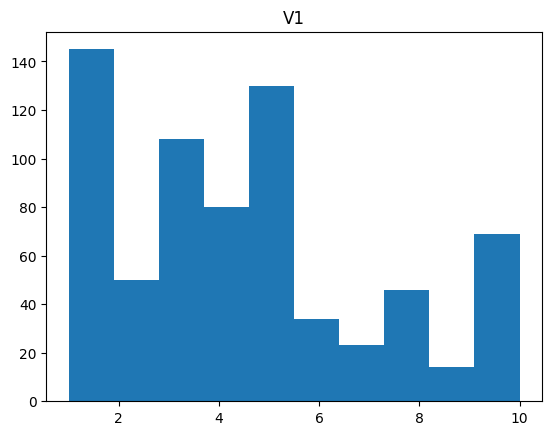

Exploring : V2 
 count    699.000000
mean       3.134478
std        3.051459
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: V2, dtype: float64


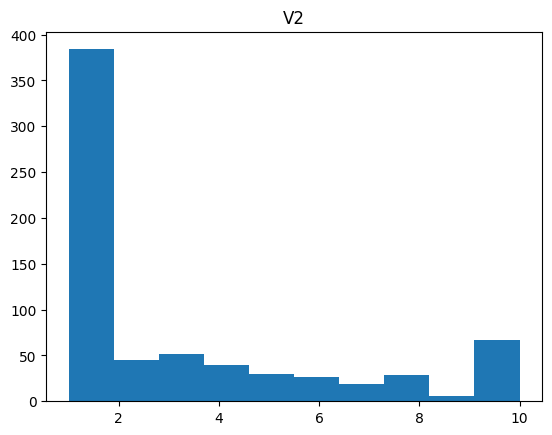

Exploring : V7 
 count    699.000000
mean       3.437768
std        2.438364
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: V7, dtype: float64


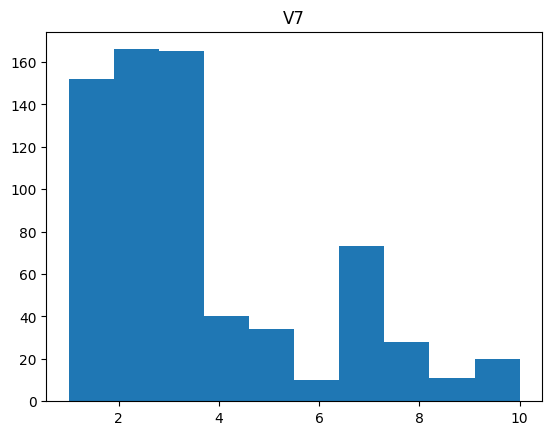

Exploring : V8 
 count    699.000000
mean       2.866953
std        3.053634
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: V8, dtype: float64


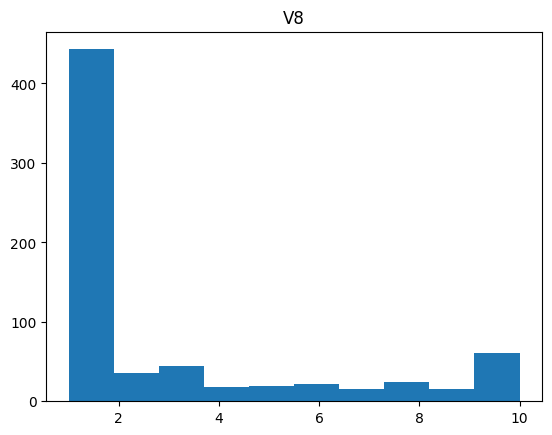

Exploring : V9 
 count    699.000000
mean       1.589413
std        1.715078
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: V9, dtype: float64


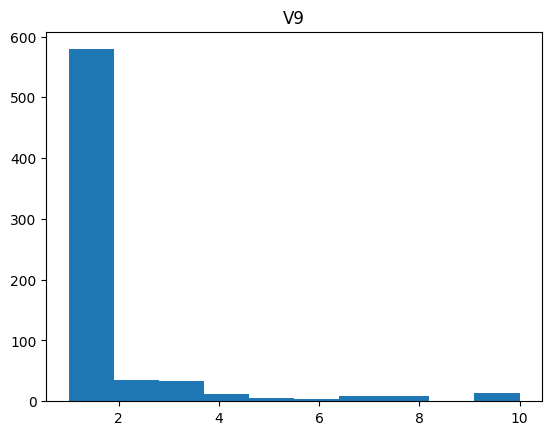

Exploring : diagnosis 
 count         699
unique          2
top       healthy
freq          489
Name: diagnosis, dtype: object


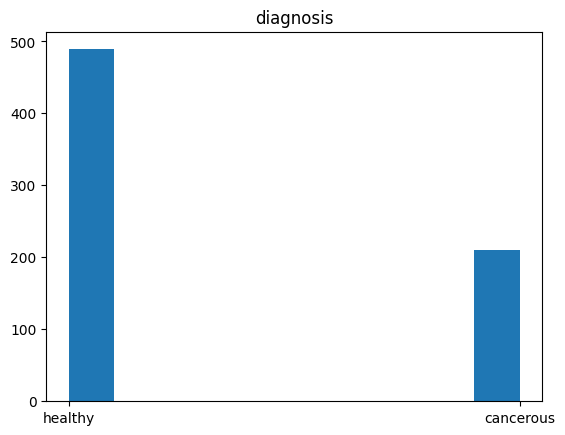

In [17]:
#create histograms
for i in records.iloc[:,:]: 
    print('Exploring :', i, '\n', records[i].describe())
    plt.hist(records[i])
    plt.title(i)
    plt.show()

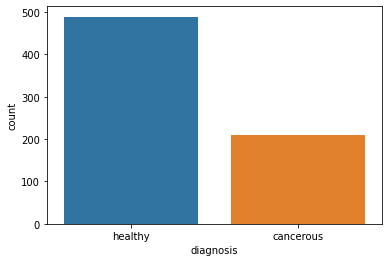

In [ ]:
from pandas.io.parsers.readers import annotations
    #create barchats
plot=sns.countplot(data=records, x='diagnosis')
plt.show()

In [18]:
records['diagnosis'].value_counts()

healthy      489
cancerous    210
Name: diagnosis, dtype: int64

**Do it yourself: examine vairables**

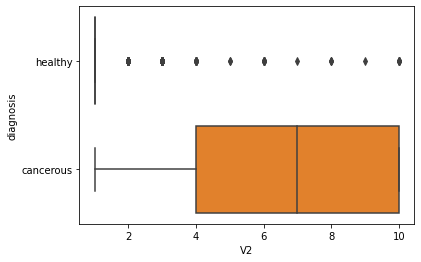

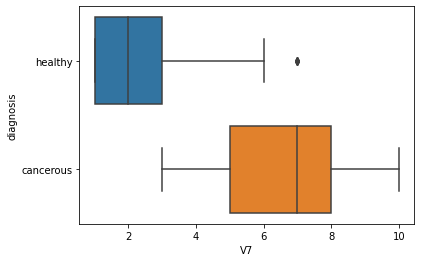

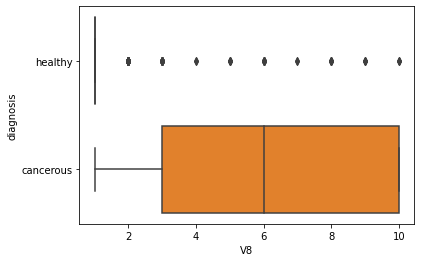

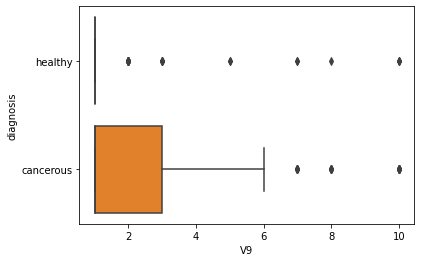

In [ ]:
for i in records.columns[1:5]:
  sns.boxplot(data=records, x=i, y='diagnosis')
  plt.show()

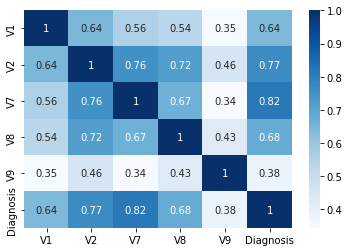

In [ ]:
sns.heatmap(data=records.corr(), cmap="Blues", annot=True)

## **1.4 Data preparation and feature selection**

In [19]:
#convert categorical data to numerical 
def coding_diagnosis(x):
        if x=='cancerous': return 1
        if x=='healthy': return 0
       
records['Diagnosis'] = records['diagnosis'].apply(coding_diagnosis)

print(records.sample(10))

     V1  V2  V7  V8  V9  diagnosis  Diagnosis
294   1   1   1   1   1    healthy          0
105   8   7   5  10   1  cancerous          1
686   4   3   4   8   1    healthy          0
67    5   4   4   1   1  cancerous          1
592   2   1   3   1   1    healthy          0
136  10  10   7  10   1  cancerous          1
532   4   2   2   1   1    healthy          0
5     4   1   2   1   1    healthy          0
21    5  10   3   6   3    healthy          0
25    5   3   3   1   1    healthy          0


<ipython-input-21-4871b880c812>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(records.corr(), cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', annot=True)


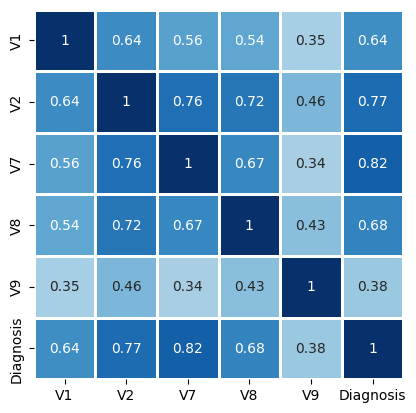

In [21]:
#generate heatmaps to explore relationships
sns.heatmap(records.corr(), cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', annot=True)
plt.show()

What can you observe in the heatmap?

**Feature Selection**

Select predictors (attributes) for Classification
Set role (Target)

In [22]:
#Selecting predictors
features =['V1', 'V2', 'V7', 'V8', 'V9'] #you can select a range of columns features = records.columns[0:5]

#complete the code below
X= records[features]
y= records['Diagnosis']  # Target variable


## **1.5 Split the dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [24]:
from sklearn.model_selection import train_test_split

In [28]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2023)  # 80% training and 20% testing 

#inspect the split datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(489, 5)
(489,)
(210, 5)
(210,)


In [29]:
#how many cancer cases are in the training and test sets
print((y_train==1).sum())
print((y_test==1).sum())

147
63


**Normalise data**

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Standardize data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

## **1.5 Initialise and Train a MLPClassifier for the classification problem**

Read about the MLP classifiers at:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 


In [58]:
#import classes and functions
from sklearn.neural_network import MLPClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

**Train a neural network**

In [61]:
# create an MLP classifier with 2 hidden layers 
ann_clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=2023, early_stopping=True)

# train the classifier on the training data
ann_clf.fit(X_train_norm, y_train)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(32, 16), max_iter=1000,
              random_state=2023)

## **1.6 Model evaluation**

In [62]:
# evaluate the classifier on the testing data
y_pred = ann_clf.predict(X_test_norm)

#get predicted probabilities for the main class
y_pred_probs = ann_clf.predict_proba(X_test_norm)
y_pred_probs = y_pred_probs[:, 1]

In [63]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[139   8]
 [ 14  49]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       147
           1       0.86      0.78      0.82        63

    accuracy                           0.90       210
   macro avg       0.88      0.86      0.87       210
weighted avg       0.89      0.90      0.89       210



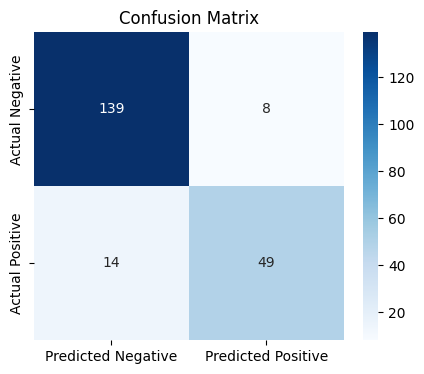

In [38]:

# Display confusion matrix
df_cm = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.show()

AUC: 0.934


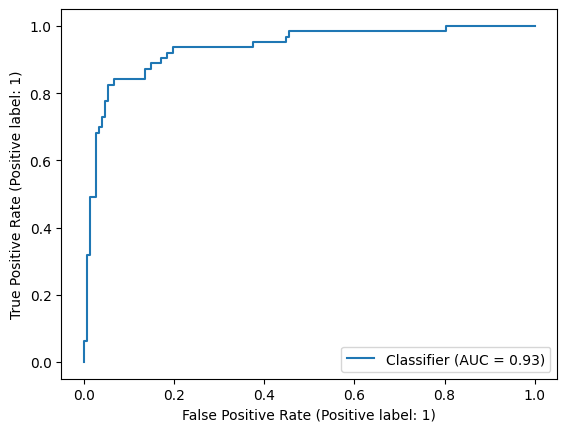

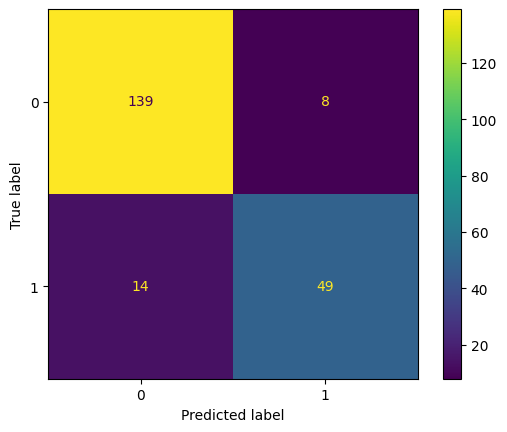

In [64]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))

#RocCurveDisplay.from_estimator(logreg,X_test, y_test)
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()



In [42]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, f'Probability: %5.3f':y_pred_probs})
inspection=pd.concat([X_test,inspection], axis=1)
inspection.sample(10)

,V1,V2,V7,V8,V9,Actual,Predicted,Probability: %5.3f
121,5,5,7,3,7,1,0,0.470559
162,10,8,7,9,1,1,1,0.666424
288,5,3,1,1,1,0,0,0.469973
335,1,1,1,1,1,0,0,0.350331
244,2,1,1,1,1,0,0,0.366391
582,2,1,3,1,1,0,0,0.387566
619,4,1,3,6,1,0,0,0.447778
566,1,1,3,2,1,0,0,0.379406
110,8,8,6,10,1,1,1,0.646968
136,10,10,7,10,1,1,1,0.690678


## **1.7 A brief Intro to Keras**
scikit-learn's MLP and Keras are popular libraries for building and training artificial neural networks (ANNs) in Python. 

Scikit-learn's MLP has a simpler and more straightforward API compared to Keras. Keras has a more complex and flexible API, which allows you to build models using a variety of functional and sequential APIs.

Scikit-learn's MLP supports only fully connected feedforward neural networks. Keras supports a wider range of architectures including convolutional neural networks (CNNs), recurrent neural networks (RNNs), and more. Keras is built on top of TensorFlow, which allows you to use GPUs and TPUs for faster computation, especially when working with large datasets or complex models. 

Scikit-learn's MLP is designed to be easy to use, especially for beginners who are new to deep learning. Keras, on the other hand, requires more expertise and knowledge of deep learning concepts, but it provides more flexibility and control over the model.

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2023)  # 80% training and 20% testing 

#inspect the split datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(489, 5)
(489,)
(210, 5)
(210,)


In [46]:
# Standardize data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [65]:
# Construct the ANN model structure
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_norm.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
# Train model
early_stopping = EarlyStopping(patience=5, monitor='val_loss')
model.fit(X_train_norm, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
13/13 [==============================] - 1s 21ms/step - loss: 0.6600 - accuracy: 0.4808 - val_loss: 0.5806 - val_accuracy: 0.8367
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5694 - accuracy: 0.8747 - val_loss: 0.5056 - val_accuracy: 0.9082
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4952 - accuracy: 0.9309 - val_loss: 0.4401 - val_accuracy: 0.9184
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4248 - accuracy: 0.9335 - val_loss: 0.3761 - val_accuracy: 0.9184
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.3549 - accuracy: 0.9309 - val_loss: 0.3193 - val_accuracy: 0.9184
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2961 - accuracy: 0.9335 - val_loss: 0.2752 - val_accuracy: 0.9184
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2504 - accuracy: 0.9335 - val_loss: 0.2414 - val_accuracy: 0.9184
Epoch 8/50
13/13 [=

In [67]:
# Predict test data labels
y_pred_probs = model.predict(X_test_norm)
y_pred = (y_pred_probs > 0.5)

7/7 [==============================] - 0s 2ms/step


In [68]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
cm_keras=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[142   5]
 [  3  60]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       147
           1       0.92      0.95      0.94        63

    accuracy                           0.96       210
   macro avg       0.95      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



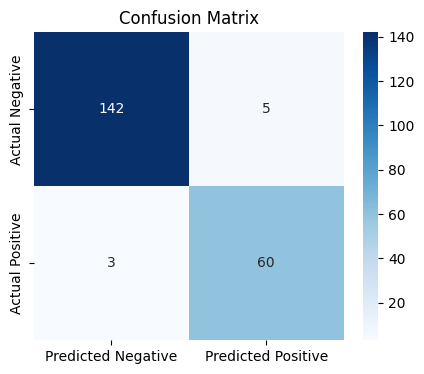

In [69]:

# Display confusion matrix
df_cm = pd.DataFrame(cm_keras, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.show()

AUC: 0.991


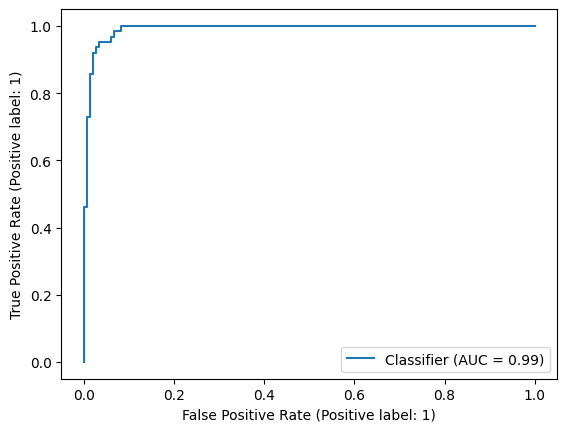

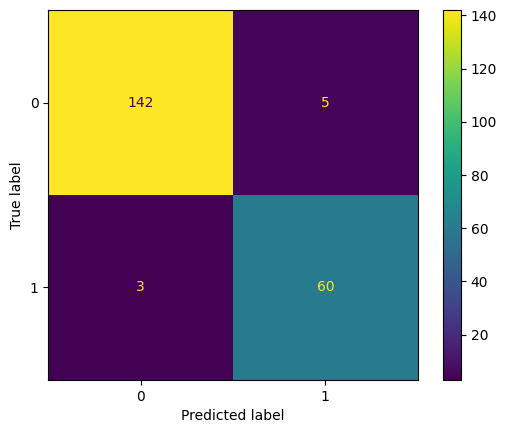

In [70]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))

#RocCurveDisplay.from_estimator(logreg,X_test, y_test)
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# **2. Case Two: Health insurance**

**MLP regression**

https://www.kaggle.com/datasets/mirichoi0218/insurance 

**Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content - Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Acknowledgements**
The dataset is available on GitHub here.

**Inspiration**
Can you accurately predict insurance costs?



# **Using ANN for regression problems**

Read about MLP regressors at:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

## **2.1 Loadding data**

In [71]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/insurance.csv'

In [91]:
#loading data
records = pd.read_csv(url)

records.head()

,age,sex,bmi,dependants,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **2.2 Cleansing and preprocessing data**

In [ ]:
#Inspect missing data
print(records.isnull().sum())

age           0
sex           0
bmi           0
dependants    0
smoker        0
region        0
charges       0
dtype: int64


In [92]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=['sex','smoker', 'region'], drop_first=True)

print(records.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   dependants        1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB
None


In [93]:
records=records.rename(columns={'smoker_yes': 'smoker'})

In [85]:
records.head()

,age,bmi,dependants,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## **2.3 Feature selection**

In [94]:
X=records.drop('charges', axis=1)
y=records['charges']

**Load libraries**

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## **2.4 Splitting data**

In [95]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.fit_transform(X_test)

## **2.5 Initialise and Train a MLPRegressor for the regression problem**

In [97]:
# Create an ANN model and fit it to the scaled training data
model = MLPRegressor(hidden_layer_sizes=(32,16), activation='relu', solver='adam', max_iter=1000, random_state=1)
model.fit(X_train_norm, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=1)

## **2.6 Model Evaluation**

In [98]:
# Use the trained model to predict on the scaled test data
y_pred= model.predict(X_test_norm)


In [99]:
# Calculate RMSE, R-squared, and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("RMSE: {:.3f}" .format(rmse))
print("R-squared: {:.3f}" .format(r2))
print("MAE: {:.3f}" .format(mae))

RMSE: 5513.299
R-squared: 0.804
MAE: 3887.232


In [100]:
records.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

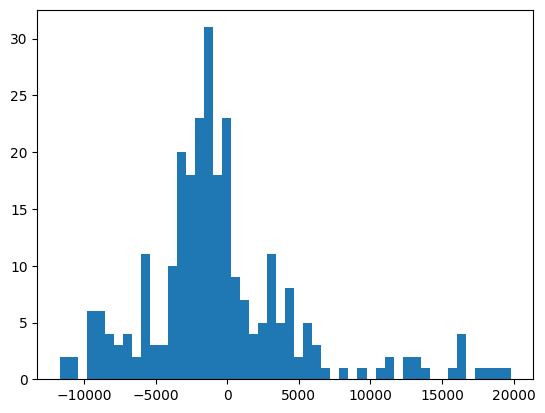

In [101]:
#Plot residuals, i.e. the differences between the actual and predicted values. 
plt.hist(x=y_test-y_pred, bins=50)
plt.xlabel='error'
plt.ylabels='count'
plt.show()

In [136]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

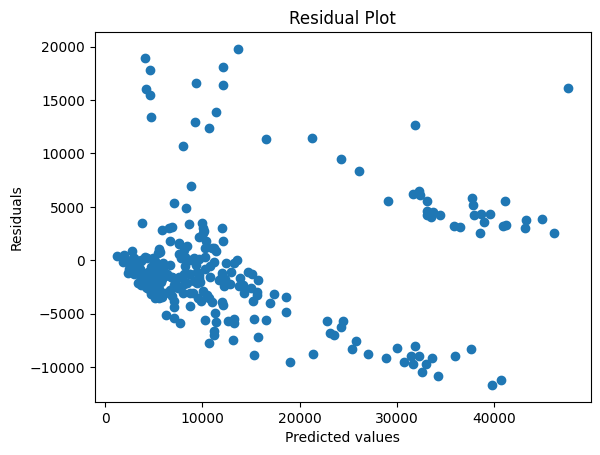

In [104]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred, y_test-y_pred)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.show()

## **2.7 A Brief Intro to Keras (cont)**

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

In [112]:
X_train_norm.shape

(1070, 8)

In [118]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_dim=6, activation='relu', input_shape=(X_train_norm.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# fit the keras model on the dataset
history = History()
history=model.fit(X_train_norm, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[history])



In [119]:
# make predictions using the model
y_pred = model.predict(X_test_norm)

# calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('R-squared: {:.2f}'.format(r2))


9/9 [==============================] - 0s 2ms/step
RMSE: 5638.58
MAE: 4051.75
R-squared: 0.80


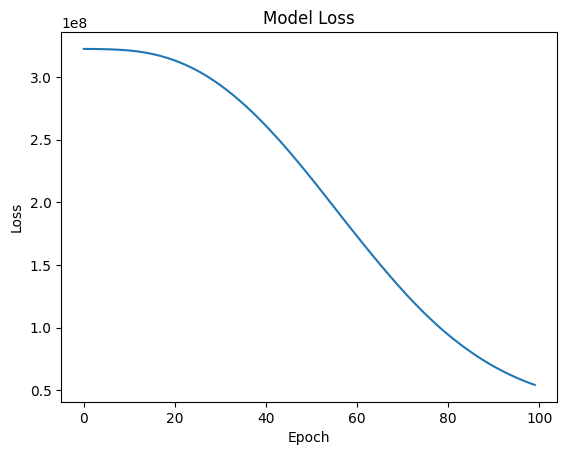

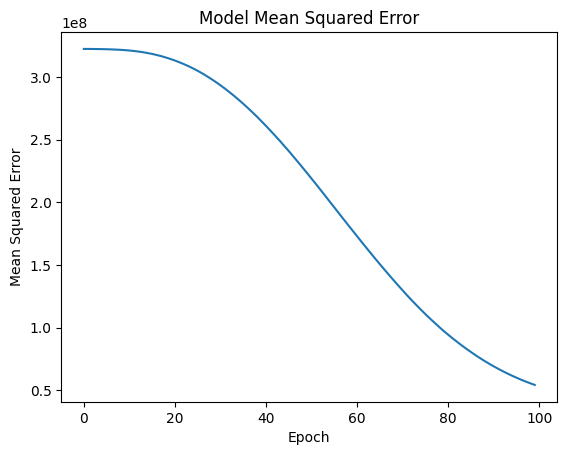

In [117]:
# plot the loss and accuracy over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [133]:
# Print the residuals
residuals = y_test - y_pred.squeeze()


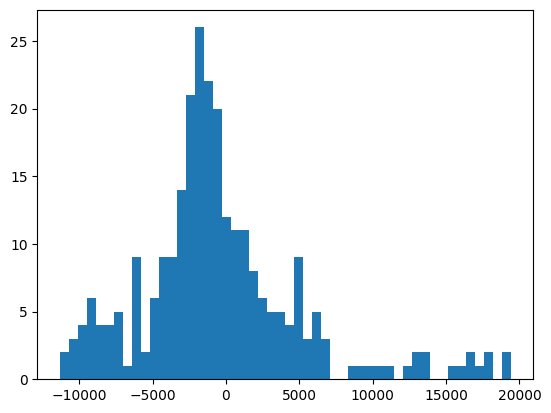

In [134]:
#Plot residuals, i.e. the differences between the actual and predicted values. 
plt.hist(residuals, bins=50)
plt.xlabel='error'
plt.ylabels='count'
plt.show()

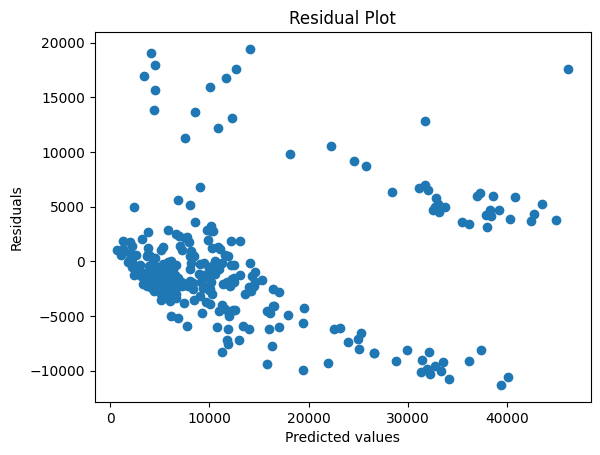

In [137]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.show()